<a href="https://colab.research.google.com/github/Ohalu909/B1_MLSJ/blob/main/Afifah_Copy_of_%5BParticipants_Copy%5D_Intro_to_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**☺️☺️ Please go to 'File' and 'Save a copy in Drive' to create a copy for yourself**

~ created by GDSC Malaysia MLSTUDYJAM 2022 mentors ~

# Welcome to GDSC Malaysia ML Study Jam

## A quick welcome message from our team 💐💐💐

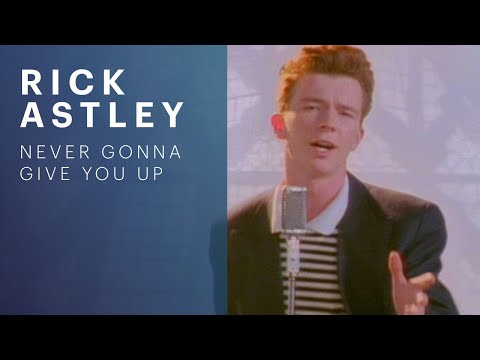

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('dQw4w9WgXcQ')

## Theory for building blocks of network


Explained in [Google Slide](https://docs.google.com/presentation/d/1S8FhtD-TFTfUvOVnvXZUxU1dr2WaNY2wMb-FJNDboWY/edit?usp=sharing&resourcekey=0-iax8y46py1rzeWYAM2hEbg)

# Steps in Machine Learning Modeling

⏪ Quick Recap:

What are the **steps to build a machine learning model**? 🙋

##STEP 1: DATA COLLECTION



## Importing the Libraries

In [ ]:
#import the libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model

### Import the MNIST Dataset 
### (Modified National Institute of Standards and Technology database)

![This is a MNIST Dataset Image](https://drive.google.com/uc?export=view&id=1FeLSazJ9-SxC4CVpLxiJltU8PNt7Jpbp)

- a dataset of _handwritten digits_
- Read more here : https://en.wikipedia.org/wiki/MNIST_database



### Data Splitting

![This is a data splitting image](https://drive.google.com/uc?export=view&id=1jU3SJGY05eq_TRM2fmPUSbBtNA-UF8ue)

Read more about Data Splitting: https://www.applause.com/blog/training-data-validation-data-vs-test-data

#### What is x and y?

![This is a image explaining on x & y values](https://drive.google.com/uc?export=view&id=1fGvknWLz-Zb8kImQbcXj1lMhFiD5l0tZ)

- x is the input (questions/image)
- y is the output (answers/label)

In [ ]:
# import MNIST dataset
from tensorflow.keras.datasets import mnist

#split the data upon loading the dataset
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [ ]:
#Take a look at the imported dataset
#For train dataset
print(x_train.shape)
print(y_train.shape)
#For test dataset
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Based on the insight above, we can see that the MNIST dataset has:

- **60,000** Train data (for training) & **10,000** Test data (for validation)
- Each images is a 28 x 28 pixel size
- Images are _1 channel depth only_ (Black & White Image)


### Let's take a look at our image and its corresponding label

- Take note that, x is the image & y is the label

#### This is an example of what array is
![This is a image explaining about Array indices](https://drive.google.com/uc?export=view&id=1kT8MDH5tqyow0vgxppMlfCJRD2mlQXwD)


In [ ]:
#Let's look at our first image of the dataset (What is our first image like?) - It is represented in a multidimensional array format
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
#And its corresponding label to the first image. (What is the answer to this first image?)
y_train[0]

5

##STEP 2: DATA PRE-PROCESSING



### Preparing the data for a basic network

<img src="https://drive.google.com/uc?id=1Rp4YTgzTsUCg7zV-5_fi0aIANMMCKxIT" alt ="diagram 1" width=500>

<img src="https://drive.google.com/uc?id=1rIMn7RJldfjE3ko4JGBO0kxNV5dag6yL" alt ="diagram 2" width=500>

In [ ]:
# changing the shape of our data to be flat vectors instead of matrices
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# Converting the ints to float for floating point math
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print(x_train.shape, x_train.dtype, 'train samples')
print(x_test.shape, x_test.dtype, 'test samples')

(60000, 784) float32 train samples
(10000, 784) float32 test samples


<img src="https://drive.google.com/uc?id=1ADrr9571XCbE8SMrvIwTUx4RXgHvFIRo" alt ="diagram 3" width=500>

In [ ]:
# Standardizing the data to be between 0-1 --- Be careful to only do this once
x_train /= 255.0
x_test /= 255.0

In [ ]:
#examine what the first image looks like
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
# first label
y_train[0]

5

### Making One Hot Encoded vectors

<img src="https://drive.google.com/uc?id=1kq4Mes6zwh1NRRfytPAcWQtx_P-94PGP" alt ="diagram 4" width=500>


In [ ]:
# number of classes
n_classes = 10

# Convert Class Scalars to One Hot Encoded vectors
y_train = tf.keras.utils.to_categorical(y_train, n_classes)
y_test = tf.keras.utils.to_categorical(y_test, n_classes)

In [ ]:
# look at our label now
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
# lets check our tensor shape
y_train.shape

(60000, 10)

### Plotting some examples

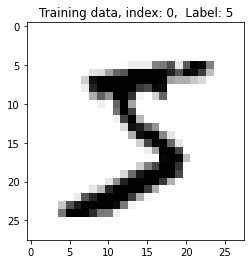

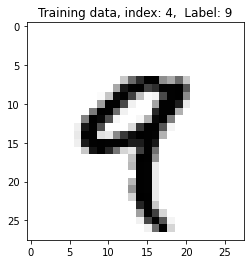

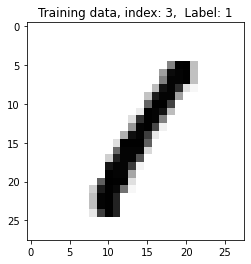

In [ ]:
# Method for displaying the number as a picture

def show_digit(index):
    label = y_train[index].argmax(axis=0)
    # Reshape 784 array into 28x28 image
    image = x_train[index].reshape([28,28])
    fig, axes = plt.subplots(1, )
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.title('Training data, index: %d,  Label: %d' % (index, label))
    plt.imshow(image, cmap='gray_r')
    plt.show()
    
def show_predicted_digit(image, pred, label):
    # Reshape 784 array into 28x28 image
    image = image.reshape([28,28])
    plt.title('Original Image, Pred: %d,  True Label: %d' %(pred, label))
    plt.imshow(image, cmap='gray_r')
    plt.show()
    
# Display the first (index 0) training image
show_digit(0)
show_digit(4)
show_digit(3)

##STEP 3: MODEL TRAINING



<img src="https://drive.google.com/uc?id=1gznLWXPC4QtpzikTi29MYto_x8leo2Cg" alt ="first network" width=500>

### Setting up our Network Hyperparameter

In [ ]:
# Network Parameters
n_input = 784 ## MNIST data input (img shape: 28*28 flattened to be 784)
n_hidden_1 = 392  # 1st layer number of neurons
n_hidden_2 = 100 # 2nd layer number of neurons
n_classes = 10 # MNIST classes for prediction(digits 0-9 )


# Training Parameters for basic MNIST
learning_rate = 0.001
training_epochs = 10
batch_size = 100

**learning_rate** = How big is the step when stepping down the mountain 

*   *step size at each iteration while moving toward a minimum of a loss function* 


**epochs** = How many times does the model see all the data

**batch_size** = How many training data to form a smaller "group"

<img src="https://drive.google.com/uc?id=1-HKqnXRsPWTwvp4vOMFKgn-8ys7V21wA" alt ="second network" width=500>


If you are confuse about epochs & batch size, read more at [a Medium article](https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9#:~:text=%20Epoch%20vs%20Batch%20Size%20vs%20Iterations%20,one%20epoch.%20Note%3A%20The%20number%20of...%20More%20) 

### Lets build our first network

In [ ]:
# building the model
Inp = Input(shape=(n_input,), name = 'Input')
x = Dense(n_hidden_1, activation='relu', name='Dense_01')(Inp)
x = Dense(n_hidden_2, activation='relu', name='Dense_02')(x)
outputs = Dense(n_classes, activation='softmax', name='Output')(x)

model = Model(Inp, outputs, name='basic_mnist_model')

####📝Explanation on activation function


<img src="https://drive.google.com/uc?id=1ADt3fosIfiSwZ-W0ldj7A47_Z2IJyN-Y" alt ="activation function" width=500>

**relu**
*   negative value --> 0
*   postive value --> remain

**softmax**
*   convert input values into probability distribution [0-1]

`` ``

You can read more here:
*  [About Relu](https://deepai.org/machine-learning-glossary-and-terms/relu) 
*  [About Softmax](https://deepai.org/machine-learning-glossary-and-terms/softmax-layer0) 
*  [More about function](https://deepai.org/machine-learning-glossary-and-terms/activation-function)

### Let's take a look at the model and its parameter

In [ ]:
# lets look at the model
model.summary()

Model: "basic_mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 784)]             0         
                                                                 
 Dense_01 (Dense)            (None, 392)               307720    
                                                                 
 Dense_02 (Dense)            (None, 100)               39300     
                                                                 
 Output (Dense)              (None, 10)                1010      
                                                                 
Total params: 348,030
Trainable params: 348,030
Non-trainable params: 0
_________________________________________________________________


#### 📝Explanation on parameters.

<img src="https://drive.google.com/uc?id=1KuSgn6Pt37HkLekAz3HWcF3SU_ewIS6a" alt ="third network" width=500>

layer 1 = (392 units * 784 weights) + (392 units * 1 bias)  = 307,720  

layer 2 = (100 units * 392 weights) + (100 units * 1 bias)  = 39,300  

layer 3 = (10 units * 100) +(10 units * bias)


Read more about the equation work together with the activation function we mentioned just now at [here](https://becominghuman.ai/understanding-neural-networks-2-the-math-of-neural-networks-in-3-equations-6085fd3f09df) 



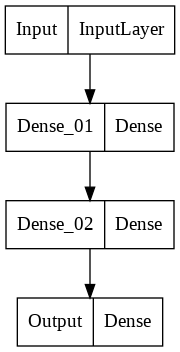

In [ ]:
# plot the model out
plot_model(model, to_file='first_model.png')

### Create the optimizer and compile the graph

In [ ]:
# setting up our Optimizer
opt = SGD(learning_rate = learning_rate)

#### 📝Explanation on SGD.


<img src="https://drive.google.com/uc?id=1I1ZJQxiSKZdiLEw0k1VMJBZvXX0QndfB" alt ="SGD" width=500>

You can read more here [about optimiser including stochastic gradient descent](https://medium.com/nerd-for-tech/optimizers-for-neural-networks-a74cb4152307) 

#### Compiling the model

In [ ]:
# compile the model
model.compile(loss='categorical_crossentropy', 
              optimizer=opt, 
              metrics=['accuracy'])

#### 📝Explanation on loss


*   measure how far an estimated value is from its true value
*   List item



<img src="https://drive.google.com/uc?id=1M2AXS1hAAWj9CzaI-eVloPe-IT0QhZPt" alt ="SGD" width=500>

You can read more here [about categorical crossentropy](https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/categorical-crossentropy)

### Training time

we fit the model using the data we pass in to it 

AKA training the model

In [ ]:
# train the model
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=training_epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/10
600/600 [==============================] - 4s 3ms/step - loss: 2.0960 - accuracy: 0.3595 - val_loss: 1.8758 - val_accuracy: 0.5802
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 1.6620 - accuracy: 0.6674 - val_loss: 1.4298 - val_accuracy: 0.7357
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 1.2609 - accuracy: 0.7645 - val_loss: 1.0739 - val_accuracy: 0.8029
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.9741 - accuracy: 0.8107 - val_loss: 0.8440 - val_accuracy: 0.8342
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.7929 - accuracy: 0.8355 - val_loss: 0.7017 - val_accuracy: 0.8530
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.6783 - accuracy: 0.8514 - val_loss: 0.6103 - val_accuracy: 0.8641
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.6025 - accuracy: 0.8611 - val_loss: 0.5482 - val_accuracy: 0.8713
Epoch 

In [ ]:
# evaluate the model
score = model.evaluate(x_test, y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.4448 - accuracy: 0.8869
Test loss: 0.4448145925998688
Test accuracy: 0.886900007724762


### Overfitting & tips on adjusting values

In [ ]:
# train the model
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=training_epochs,
          verbose=1,
          validation_data=(x_test,y_test))

Epoch 1/10
600/600 [==============================] - 2s 3ms/step - loss: 0.4564 - accuracy: 0.8835 - val_loss: 0.4239 - val_accuracy: 0.8899
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.4369 - accuracy: 0.8867 - val_loss: 0.4073 - val_accuracy: 0.8932
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.4207 - accuracy: 0.8895 - val_loss: 0.3927 - val_accuracy: 0.8963
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.4069 - accuracy: 0.8917 - val_loss: 0.3803 - val_accuracy: 0.8982
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.3949 - accuracy: 0.8947 - val_loss: 0.3699 - val_accuracy: 0.9011
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.3846 - accuracy: 0.8969 - val_loss: 0.3609 - val_accuracy: 0.9030
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.3753 - accuracy: 0.8989 - val_loss: 0.3526 - val_accuracy: 0.9035
Epoch 

#### A little bit more on customising the model for different datasets


*   Naming convention
*   Number of layers
*   Number of neurons
*   Training Epochs
*   Batch size
*   Learning rate




## 🤔What's next?

#### 📖Self Learning
More datasets from Tensorflow:
1. Extended MNIST (include handwritten uppercase & lowercase letters with digits)
```
import tensorflow_datasets as tfds
train,test = tfds.load('emnist', split=['train', 'test'])
```
2. Kuzushiji MNIST (on Classical Japanese Literature)
```
import tensorflow_datasets as tfds
train,test = tfds.load('kmnist', split=['train', 'test'])
```
3. More in https://analyticsindiamag.com/mnist/


External datasets:
1.   https://archive.ics.uci.edu/ml/datasets/Letter+Recognition
2.   https://www.nist.gov/itl/products-and-services/emnist-dataset



